### Работу выполнил студент Ногин Д.А. группы 3821Б1ФИ2

#Информация о датасете

Датасет содержит информацию о 19237 автомобилях, предлагаемых на продаже. Каждая запись включает в себя следующие ключевые характеристики:

- **ID**: уникальный идентификатор автомобиля.
- **Цена**: стоимость автомобиля в валюте.
- **Налог**: размер налога.
- **Производитель**: марка автомобиля (например, Lexus, Honda).
- **Модель**: конкретная модель автомобиля.
- **Год выпуска**: год, когда автомобиль был произведен.
- **Категория**: тип автомобиля (например, внедорожник, седан, хэтчбек).
- **Кожаный салон**: информация о наличии кожаного интерьера.
- **Тип топлива**: вид топлива, необходимого для работы двигателя (например, бензин, дизель, гибрид).
- **Объем двигателя**: объем двигателя, указанный в литрах.
- **Пробег**: общее количество километров, пройденных автомобилем.
- **Количество цилиндров**: количество цилиндров в двигателе.
- **Тип коробки передач**: автоматическая или механическая.
- **Привод**: тип привода (например, передний, задний, полный).
- **Количество дверей**: количество дверей у автомобиля.
- **Расположение руля**: информация о том, с какой стороны находится руль.
- **Цвет**: цвет кузова автомобиля.
- **Количество airbags**: количество подушек безопасности.

На основе этого датасета я буду угадывать цену автомобиля (**Price**) по его характеристикам.

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_raw = pd.read_csv('car_price_prediction.csv')

In [48]:
data_raw.shape

(19237, 18)

In [49]:
data_raw

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [50]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

Проверим на наличие нулевых значений:

In [51]:
data_raw = data_raw.replace("-", np.nan)

data_raw.isnull().sum()

,0
ID,0
Price,0
Levy,5819
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


# Удаление ненужные нам данных

Удалим из датасета данные, которые не будут сильно влиять на стоимость автомобиля

В столбце `Levy` слишком много пустых значений, проще будет просто не учитывать его в нашей задаче регрессии

In [52]:
data_raw = data_raw.drop(columns="Levy")

Также удалим `ID` и `Model`, так как они не виляют на стоимость автомобиля

In [53]:
columns_for_remove = ["ID", "Model"]
data_raw = data_raw.drop(columns=columns_for_remove)

Так же удалим `Color`, так как он совсем несущественно влияет на стоимость автомобиля

In [54]:
data_raw = data_raw.drop(columns="Color")

In [55]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Manufacturer      19237 non-null  object 
 2   Prod. year        19237 non-null  int64  
 3   Category          19237 non-null  object 
 4   Leather interior  19237 non-null  object 
 5   Fuel type         19237 non-null  object 
 6   Engine volume     19237 non-null  object 
 7   Mileage           19237 non-null  object 
 8   Cylinders         19237 non-null  float64
 9   Gear box type     19237 non-null  object 
 10  Drive wheels      19237 non-null  object 
 11  Doors             19237 non-null  object 
 12  Wheel             19237 non-null  object 
 13  Airbags           19237 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 2.1+ MB


Убираем символы из столбцов, где они указаны вместе с числовыми данными (Например `km` в столбце `Mileage`) и приведём данные признаки к числовому типу


In [56]:
data_raw["Engine volume"] = data_raw["Engine volume"].str.replace(r"[^\d.]", "", regex=True).astype(float)
data_raw["Mileage"] = data_raw["Mileage"].str.replace(r"[^\d]", "", regex=True).astype(float)

# Считаем квантиль для столбца **Price**



In [57]:
data_raw[["Price", "Mileage"]].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,Price,Mileage
0.005,30.0,0.00
0.010,45.0,0.00
0.050,314.0,2313.20
0.100,627.0,25061.40
0.500,13172.0,126000.00
0.900,38609.0,265210.00
0.950,49459.0,320000.00
0.990,84675.0,571246.84
0.995,103491.0,777777.00


# Визуализируем коробчатую диаграмму для столбца **Price**
Отобразим графическое представление, которое отображает распределение данных, включая медиану, квартили и выбросы.

<Axes: >

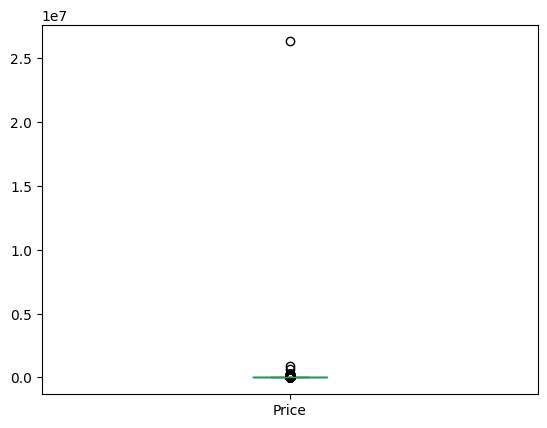

In [58]:
data_raw['Price'].plot(kind='box')

<Axes: >

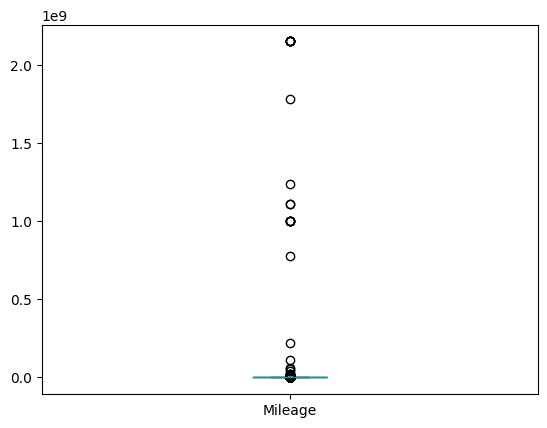

In [59]:
data_raw['Mileage'].plot(kind='box')

Как мы можем заметить, у нас есть немного выбросов, которые необходимо обработать

# Удалим строки таблицы с выбросами
Удалим строки, в которых значения `Price` и `Mileage` выходят за пределы квантилей 0.05 и 0.95


In [60]:
rows_to_drop = data_raw[
    (data_raw['Price'] < data_raw['Price'].quantile(0.05)) | (data_raw['Price'] > data_raw['Price'].quantile(0.95)) |
    (data_raw['Mileage'] < data_raw['Mileage'].quantile(0.05)) | (data_raw['Mileage'] > data_raw['Mileage'].quantile(0.95))].index
data_raw = data_raw.drop(rows_to_drop)

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15624 entries, 0 to 19236
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15624 non-null  int64  
 1   Manufacturer      15624 non-null  object 
 2   Prod. year        15624 non-null  int64  
 3   Category          15624 non-null  object 
 4   Leather interior  15624 non-null  object 
 5   Fuel type         15624 non-null  object 
 6   Engine volume     15624 non-null  float64
 7   Mileage           15624 non-null  float64
 8   Cylinders         15624 non-null  float64
 9   Gear box type     15624 non-null  object 
 10  Drive wheels      15624 non-null  object 
 11  Doors             15624 non-null  object 
 12  Wheel             15624 non-null  object 
 13  Airbags           15624 non-null  int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 1.8+ MB


Снова выведем коробчатую диаграмму столбцов `Price` и `Mileage`

<Axes: >

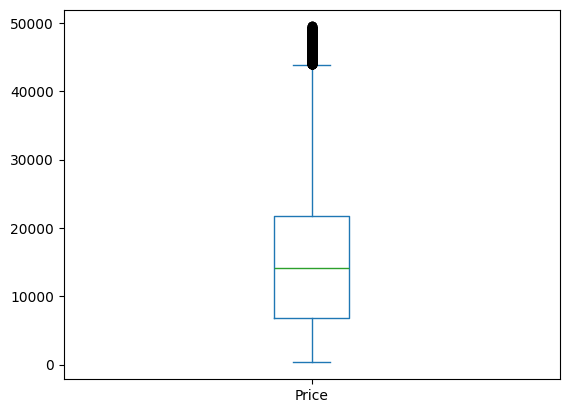

In [61]:
data_raw['Price'].plot(kind='box')

<Axes: >

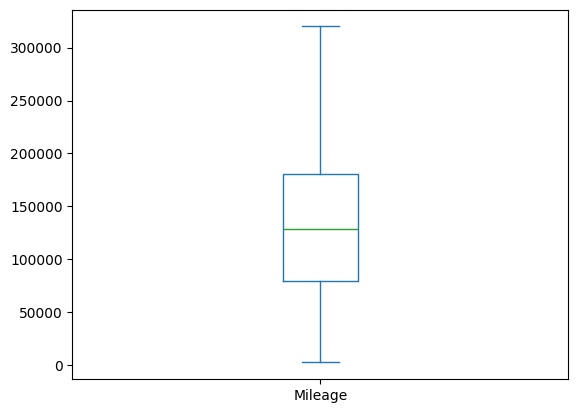

In [62]:
data_raw['Mileage'].plot(kind='box')

# Визуализируем матрицу рассеивания

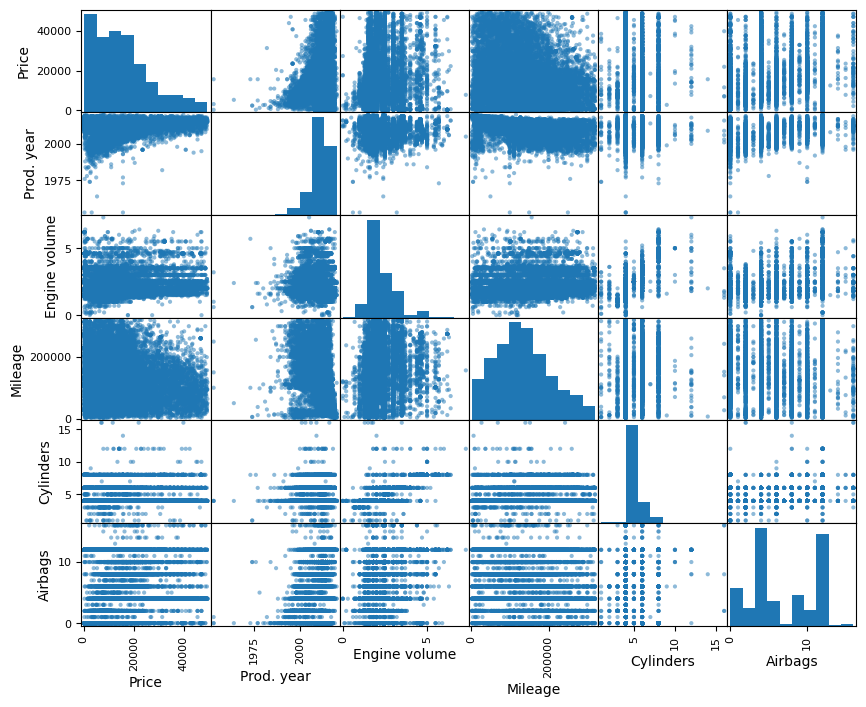

In [63]:
pd.plotting.scatter_matrix(data_raw, figsize=(10, 8))

plt.show()

# Обработка категориальных признаков

Выведем информацию о датасете

In [64]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15624 entries, 0 to 19236
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15624 non-null  int64  
 1   Manufacturer      15624 non-null  object 
 2   Prod. year        15624 non-null  int64  
 3   Category          15624 non-null  object 
 4   Leather interior  15624 non-null  object 
 5   Fuel type         15624 non-null  object 
 6   Engine volume     15624 non-null  float64
 7   Mileage           15624 non-null  float64
 8   Cylinders         15624 non-null  float64
 9   Gear box type     15624 non-null  object 
 10  Drive wheels      15624 non-null  object 
 11  Doors             15624 non-null  object 
 12  Wheel             15624 non-null  object 
 13  Airbags           15624 non-null  int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 1.8+ MB


Как мы видим, столбцы `Manufacturer`, `Fuel type`, `Engine volume`, `Milleage`, `Gear box type`, `Drive wheels`, `Doors`, `Wheel`, `Color` имеют тип object


Остальные признаки приведём к категориальному типу

In [65]:
data_raw['Manufacturer'] = data_raw['Manufacturer'].astype('category')
data_raw['Category'] = data_raw['Category'].astype('category')
data_raw['Fuel type'] = data_raw['Fuel type'].astype('category')
data_raw['Gear box type'] = data_raw['Gear box type'].astype('category')
data_raw['Drive wheels'] = data_raw['Drive wheels'].astype('category')
data_raw['Doors'] = data_raw['Doors'].astype('category')
data_raw['Wheel'] = data_raw['Wheel'].astype('category')

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15624 entries, 0 to 19236
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Price             15624 non-null  int64   
 1   Manufacturer      15624 non-null  category
 2   Prod. year        15624 non-null  int64   
 3   Category          15624 non-null  category
 4   Leather interior  15624 non-null  object  
 5   Fuel type         15624 non-null  category
 6   Engine volume     15624 non-null  float64 
 7   Mileage           15624 non-null  float64 
 8   Cylinders         15624 non-null  float64 
 9   Gear box type     15624 non-null  category
 10  Drive wheels      15624 non-null  category
 11  Doors             15624 non-null  category
 12  Wheel             15624 non-null  category
 13  Airbags           15624 non-null  int64   
dtypes: category(7), float64(3), int64(3), object(1)
memory usage: 1.1+ MB


Выведем количество уникальных значений для каждого категориального признака

In [66]:
data_raw['Manufacturer'].unique()

['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', ..., 'MOSKVICH', 'ROVER', 'PONTIAC', 'SATURN', 'GREATWALL']
Length: 59
Categories (59, object): ['ACURA', 'ALFA ROMEO', 'AUDI', 'BMW', ..., 'VOLKSWAGEN', 'VOLVO', 'ZAZ',
                          'სხვა']

In [67]:
data_raw['Category'].unique()

['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon', ..., 'Coupe', 'Minivan', 'Cabriolet', 'Limousine', 'Pickup']
Length: 11
Categories (11, object): ['Cabriolet', 'Coupe', 'Goods wagon', 'Hatchback', ..., 'Minivan', 'Pickup',
                          'Sedan', 'Universal']

In [68]:
data_raw['Fuel type'].unique()

['Hybrid', 'Petrol', 'Diesel', 'Plug-in Hybrid', 'CNG', 'LPG', 'Hydrogen']
Categories (7, object): ['CNG', 'Diesel', 'Hybrid', 'Hydrogen', 'LPG', 'Petrol',
                         'Plug-in Hybrid']

In [69]:
data_raw['Gear box type'].unique()

['Automatic', 'Tiptronic', 'Variator', 'Manual']
Categories (4, object): ['Automatic', 'Manual', 'Tiptronic', 'Variator']

In [70]:
data_raw['Drive wheels'].unique()

['4x4', 'Front', 'Rear']
Categories (3, object): ['4x4', 'Front', 'Rear']

In [71]:
data_raw['Doors'].unique()

['04-May', '02-Mar', '>5']
Categories (3, object): ['02-Mar', '04-May', '>5']

In [72]:
data_raw['Wheel'].unique()

['Left wheel', 'Right-hand drive']
Categories (2, object): ['Left wheel', 'Right-hand drive']

В столбцах с двумя категориальными значениями заменим эти значения на 1 и 0.

In [73]:
data_raw.replace({"Leather interior": {"Yes": 1, "No": 0}, "Wheel": {"Left wheel": 1, "Right-hand drive": 0}}, inplace=True)
data_raw["Leather interior"] = data_raw["Leather interior"].astype(int)
data_raw["Wheel"] = data_raw["Wheel"].astype(int)
print(data_raw)

       Price   Manufacturer  Prod. year   Category  Leather interior  \
0      13328          LEXUS        2010       Jeep                 1   
1      16621      CHEVROLET        2011       Jeep                 0   
2       8467          HONDA        2006  Hatchback                 0   
3       3607           FORD        2011       Jeep                 1   
4      11726          HONDA        2014  Hatchback                 1   
...      ...            ...         ...        ...               ...   
19232   8467  MERCEDES-BENZ        1999      Coupe                 1   
19233  15681        HYUNDAI        2011      Sedan                 1   
19234  26108        HYUNDAI        2010       Jeep                 1   
19235   5331      CHEVROLET        2007       Jeep                 1   
19236    470        HYUNDAI        2012      Sedan                 1   

      Fuel type  Engine volume   Mileage  Cylinders Gear box type  \
0        Hybrid            3.5  186005.0        6.0     Automatic 

<ipython-input-73-14d8397d9247>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_raw.replace({"Leather interior": {"Yes": 1, "No": 0}, "Wheel": {"Left wheel": 1, "Right-hand drive": 0}}, inplace=True)
<ipython-input-73-14d8397d9247>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_raw.replace({"Leather interior": {"Yes": 1, "No": 0}, "Wheel": {"Left wheel": 1, "Right-hand drive": 0}}, inplace=True)


Для остальных категориальных признаков применим применим `One-Hot Encoding`: преобразование каждого уникального значения в новый столбец с бинарными значениями (0 или 1), обозначающими наличие категории.

In [74]:
data = pd.get_dummies(data_raw, columns=["Manufacturer", "Category", "Fuel type", "Gear box type", "Drive wheels", "Doors"])
data = data.replace({False: 0, True: 1})

data

<ipython-input-74-9a6cc69fa626>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({False: 0, True: 1})


,Price,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Wheel,Airbags,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,...,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_02-Mar,Doors_04-May,Doors_>5
0,13328,2010,1,3.5,186005.0,6.0,1,12,0,0,...,1,0,0,0,1,0,0,0,1,0
1,16621,2011,0,3.0,192000.0,6.0,1,8,0,0,...,0,0,1,0,1,0,0,0,1,0
2,8467,2006,0,1.3,200000.0,4.0,0,2,0,0,...,0,0,0,1,0,1,0,0,1,0
3,3607,2011,1,2.5,168966.0,4.0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,11726,2014,1,1.3,91901.0,4.0,1,4,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,1999,1,2.0,300000.0,4.0,1,5,0,0,...,0,1,0,0,0,0,1,1,0,0
19233,15681,2011,1,2.4,161600.0,4.0,1,8,0,0,...,0,0,1,0,0,1,0,0,1,0
19234,26108,2010,1,2.0,116365.0,4.0,1,4,0,0,...,1,0,0,0,0,1,0,0,1,0
19235,5331,2007,1,2.0,51258.0,4.0,1,4,0,0,...,1,0,0,0,0,1,0,0,1,0


# Получаем статистическое описание столбцов

In [75]:
data.describe()

,Price,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Wheel,Airbags,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,...,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_02-Mar,Doors_04-May,Doors_>5
count,15624.000000,15624.000000,15624.000000,15624.000000,15624.000000,15624.000000,15624.000000,15624.000000,15624.000000,15624.000000,...,15624.000000,15624.000000,15624.000000,15624.000000,15624.000000,15624.000000,15624.000000,15624.000000,15624.000000,15624.000000
mean,15617.927227,2010.996224,0.717934,2.263543,134436.521633,4.521825,0.921659,6.655210,0.000704,0.000256,...,0.703405,0.090694,0.163594,0.042307,0.194444,0.690796,0.114759,0.040579,0.953341,0.006080
std,11640.577404,5.228521,0.450020,0.821915,71934.500068,1.137890,0.268716,4.243226,0.026525,0.015999,...,0.456771,0.287182,0.369919,0.201294,0.395785,0.462180,0.318741,0.197318,0.210914,0.077742
min,314.000000,1953.000000,0.000000,0.000000,2336.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6886.750000,2009.000000,0.000000,1.700000,79080.000000,4.000000,1.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,14069.000000,2012.000000,1.000000,2.000000,128198.500000,4.000000,1.000000,6.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21687.000000,2014.000000,1.000000,2.500000,180073.500000,4.000000,1.000000,12.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,49459.000000,2020.000000,1.000000,7.300000,320000.000000,16.000000,1.000000,16.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Построим некоторые графики

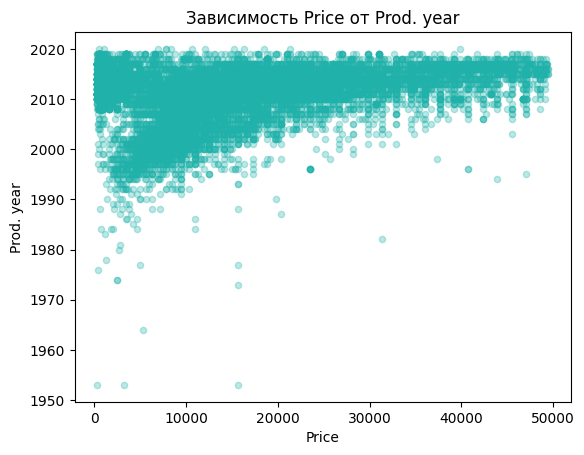

In [76]:
data.plot(kind = 'scatter', x = 'Price', y = 'Prod. year', alpha=.3, color = 'lightseagreen')
plt.title('Зависимость Price от Prod. year')
plt.show()

Можно заметить, что дорогие автомобили в основном новые

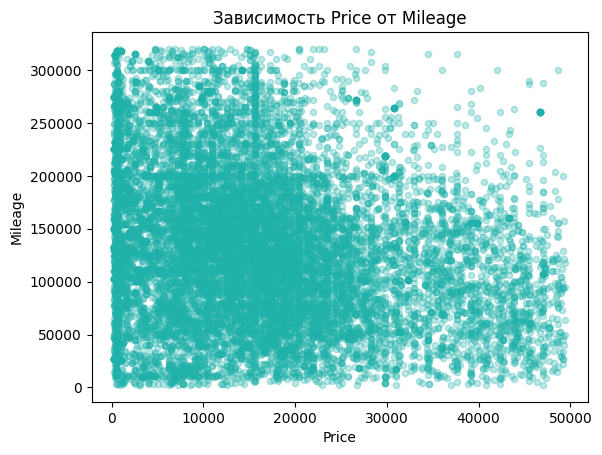

In [77]:
data.plot(kind = 'scatter', x = 'Price', y = 'Mileage', alpha=.3, color = 'lightseagreen')
plt.title('Зависимость Price от Mileage')
plt.show()

Как зависит цена от километража сказать точно нельзя, но дорогих автомобилей с пробегом больше 150000 правктически нет

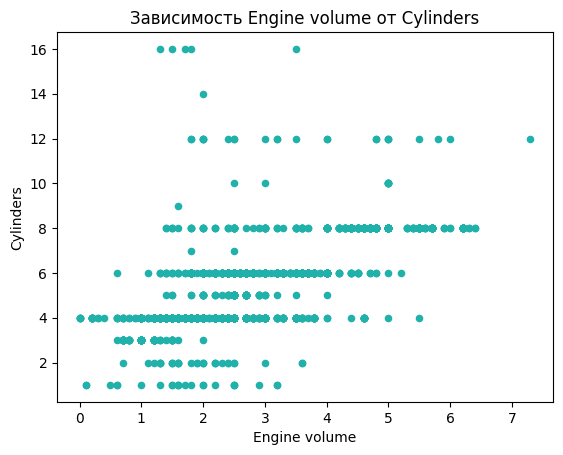

In [78]:
data.plot(kind='scatter', x='Engine volume', y='Cylinders', color = 'lightseagreen')
plt.title('Зависимость Engine volume от Cylinders')
plt.show()

Имеется небольшая зависимость между количесвтом цилиндров и громкостью двигателя

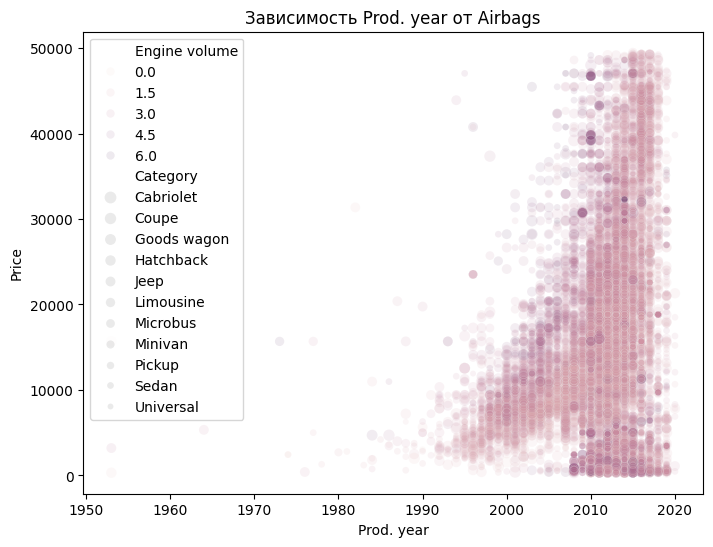

In [79]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x='Prod. year', y='Price', size='Category', hue='Engine volume', data=data_raw, alpha=0.1)
plt.title('Зависимость Prod. year от Airbags')
plt.show()

Просто интересный график

# Подсчитываем среднее значение для каждого признака

In [80]:
mean_values = data.mean()
print("Средние значения:\n", mean_values)

Средние значения:
 Price                  15617.927227
Prod. year              2010.996224
Leather interior           0.717934
Engine volume              2.263543
Mileage               134436.521633
                          ...      
Drive wheels_Front         0.690796
Drive wheels_Rear          0.114759
Doors_02-Mar               0.040579
Doors_04-May               0.953341
Doors_>5                   0.006080
Length: 95, dtype: float64


# Подсчитываем разброс для каждого признака

In [81]:
variance_values = data.var()
print("\nРазброс (дисперсия):\n", variance_values)


Разброс (дисперсия):
 Price                 1.355030e+08
Prod. year            2.733744e+01
Leather interior      2.025178e-01
Engine volume         6.755447e-01
Mileage               5.174572e+09
                          ...     
Drive wheels_Front    2.136105e-01
Drive wheels_Rear     1.015961e-01
Doors_02-Mar          3.893447e-02
Doors_04-May          4.448477e-02
Doors_>5              6.043805e-03
Length: 95, dtype: float64


# Нормализируем данные

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_norm = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

data_norm

,Price,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Wheel,Airbags,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,...,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_02-Mar,Doors_04-May,Doors_>5
0,-0.196726,-0.190543,0.626806,1.504409,0.716904,1.299090,0.291548,1.259646,-0.026543,-0.016003,...,0.64935,-0.315816,-0.442258,-0.210180,2.035401,-1.494695,-0.360050,-0.205657,0.221230,-0.078215
1,0.086173,0.000722,-1.595390,0.896054,0.800246,1.299090,0.291548,0.316936,-0.026543,-0.016003,...,-1.54000,-0.315816,2.261123,-0.210180,2.035401,-1.494695,-0.360050,-0.205657,0.221230,-0.078215
2,-0.614330,-0.955602,-1.595390,-1.172352,0.911462,-0.458605,-3.429972,-1.097127,-0.026543,-0.016003,...,-1.54000,-0.315816,-0.442258,4.757827,-0.491304,0.669033,-0.360050,-0.205657,0.221230,-0.078215
3,-1.031848,0.000722,0.626806,0.287699,0.480028,-0.458605,0.291548,-1.568482,-0.026543,-0.016003,...,0.64935,-0.315816,-0.442258,-0.210180,2.035401,-1.494695,-0.360050,-0.205657,0.221230,-0.078215
4,-0.334352,0.574517,0.626806,-1.172352,-0.591328,-0.458605,0.291548,-0.625773,-0.026543,-0.016003,...,0.64935,-0.315816,-0.442258,-0.210180,-0.491304,0.669033,-0.360050,-0.205657,0.221230,-0.078215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15619,-0.614330,-2.294455,0.626806,-0.320656,2.301660,-0.458605,0.291548,-0.390095,-0.026543,-0.016003,...,-1.54000,3.166404,-0.442258,-0.210180,-0.491304,-1.494695,2.777389,4.862462,-4.520188,-0.078215
15620,0.005419,0.000722,0.626806,0.166028,0.377626,-0.458605,0.291548,0.316936,-0.026543,-0.016003,...,-1.54000,-0.315816,2.261123,-0.210180,-0.491304,0.669033,-0.360050,-0.205657,0.221230,-0.078215
15621,0.901193,-0.190543,0.626806,-0.320656,-0.251230,-0.458605,0.291548,-0.625773,-0.026543,-0.016003,...,0.64935,-0.315816,-0.442258,-0.210180,-0.491304,0.669033,-0.360050,-0.205657,0.221230,-0.078215
15622,-0.883741,-0.764337,0.626806,-0.320656,-1.156346,-0.458605,0.291548,-0.625773,-0.026543,-0.016003,...,0.64935,-0.315816,-0.442258,-0.210180,-0.491304,0.669033,-0.360050,-0.205657,0.221230,-0.078215


# Строим корреляционную матрицу

In [83]:
correlation_matrix = data_norm.corr()
correlation_matrix

,Price,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Wheel,Airbags,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,...,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_02-Mar,Doors_04-May,Doors_>5
Price,1.000000,0.282281,0.091569,0.023897,-0.225189,-0.021374,0.145788,-0.085361,-0.018256,-0.007874,...,-0.078553,-0.108523,0.187625,-0.011721,-0.043529,0.054367,-0.024782,-0.030513,0.021362,0.019492
Prod. year,0.282281,1.000000,0.363721,-0.069009,-0.364824,-0.134808,0.241428,0.231199,0.004634,-0.018353,...,0.374215,-0.493409,-0.059581,-0.035730,-0.092222,0.278671,-0.289564,-0.211913,0.214077,-0.042933
Leather interior,0.091569,0.363721,1.000000,0.270296,-0.054699,0.188083,0.342861,0.136948,0.016637,-0.007750,...,0.373328,-0.366163,-0.066149,-0.203185,0.074001,-0.046673,-0.024211,-0.108248,0.113546,-0.033305
Engine volume,0.023897,-0.069009,0.270296,1.000000,0.205838,0.794697,0.179357,0.230340,0.029362,-0.008052,...,0.030938,-0.114312,0.126900,-0.140322,0.468608,-0.576018,0.253358,0.021870,-0.024693,0.011483
Mileage,-0.225189,-0.364824,-0.054699,0.205838,1.000000,0.190904,-0.022766,-0.044713,0.006780,0.007756,...,-0.081774,0.139296,-0.024047,0.031019,0.156679,-0.201280,0.097309,0.025202,-0.024555,0.002653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Drive wheels_Front,0.054367,0.278671,-0.046673,-0.576018,-0.201280,-0.565104,-0.002817,-0.107598,-0.013568,0.010706,...,0.149522,-0.092040,-0.166479,0.097961,-0.734349,1.000000,-0.538166,-0.133331,0.135653,-0.029617
Drive wheels_Rear,-0.024782,-0.289564,-0.024211,0.253358,0.097309,0.267433,0.022020,0.080890,-0.009557,-0.005762,...,-0.234859,0.217041,0.159968,-0.070687,-0.176894,-0.538166,1.000000,0.233306,-0.228833,0.028667
Doors_02-Mar,-0.030513,-0.211913,-0.108248,0.021870,0.025202,0.043664,-0.012472,-0.043301,-0.005459,0.016985,...,-0.186039,0.271660,0.040585,-0.040002,-0.032193,-0.133331,0.233306,1.000000,-0.929609,-0.016085
Doors_04-May,0.021362,0.214077,0.113546,-0.024693,-0.024555,-0.048164,0.013428,0.038167,0.005872,-0.015428,...,0.193861,-0.270406,-0.049010,0.035945,0.025879,0.135653,-0.228833,-0.929609,1.000000,-0.353547


# Визуализируем корреляционную матрицу


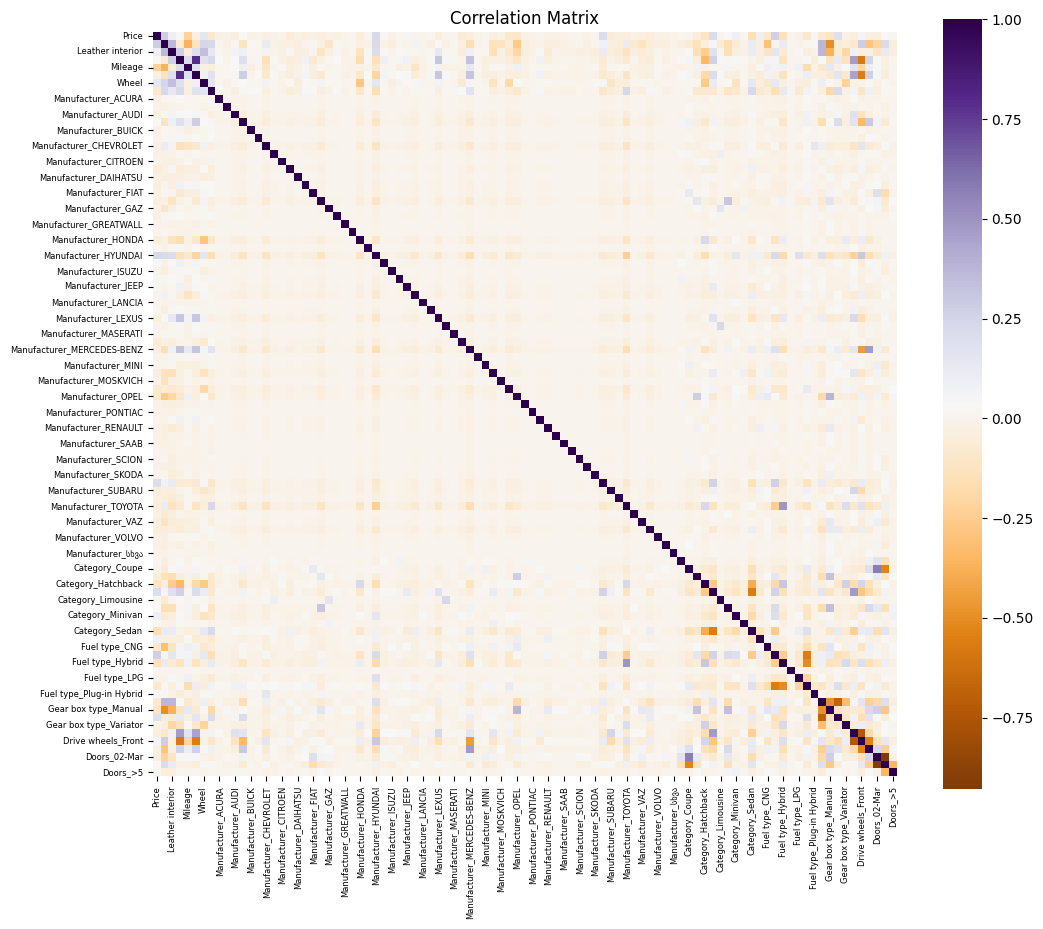

In [84]:
correlation_matrix = data_norm.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, square=True, cmap="PuOr", fmt=".1f")
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.title("Correlation Matrix")
plt.show()

Проанализировав корреляционную матрицу, мы можем увидеть, `Engine volume` имеет положительную корреляция с `Cylinders`, в то время как `Prod. year` итмеет отрицательную корреляцию с `Mileage`. Так же мы можем увидеть, что `Price` практически не зависит от `Engine volume` и `Cylinders`.

# Разделение данных на обучающую и тестовую выборки

In [85]:
from sklearn.model_selection import train_test_split

X = data_norm.drop(columns=['Price'])
y = data_norm['Price']

# Разделяем данные на обучающую и тестовую выборки (80% для обучения, 20% для тестирования)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размер обучающей выборки:", X_train.shape, y_train.shape)
print("Размер тестовой выборки:", X_test.shape, y_test.shape)

Размер обучающей выборки: (12499, 94) (12499,)
Размер тестовой выборки: (3125, 94) (3125,)


In [86]:
type(X)

pandas.core.frame.DataFrame

In [87]:
type(y)

pandas.core.series.Series

 # Запуск регрессии и вычисление ошибок

## Линейная регрессия

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print(f"- - LinearRegression - -\n\n"
      f"RMSE_train - {RMSE_train}\n"
      f"RMSE_test - {RMSE_test}\n"
      f"R2_train - {R2_train}\n"
      f"R2_test - {R2_test}\n")

- - LinearRegression - -

RMSE_train - 0.7919162292793208
RMSE_test - 890258511842.6542
R2_train - 0.36970888788804823
R2_test - -7.769818499632478e+23



In [89]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print(f"- KNeighborsRegressor -\n\n"
      f"RMSE_train - {RMSE_train}\n"
      f"RMSE_test - {RMSE_test}\n"
      f"R2_train - {R2_train}\n"
      f"R2_test - {R2_test}\n")

- KNeighborsRegressor -

RMSE_train - 0.4679519763596367
RMSE_test - 0.6041107827214843
R2_train - 0.7799176229877712
R2_test - 0.6422235260983999



# Случайный лес

In [90]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print(f"- RandomForestRegressor -\n\n"
      f"RMSE_train - {RMSE_train}\n"
      f"RMSE_test - {RMSE_test}\n"
      f"R2_train - {R2_train}\n"
      f"R2_test - {R2_test}\n")

- RandomForestRegressor -

RMSE_train - 0.20253685905313074
RMSE_test - 0.5005016405806912
R2_train - 0.9587721357231228
R2_test - 0.7544219111159205



Как мы можем заметить, Линейная регрессия совершенно не справляется с таким набором данных, а лучше всего предсказывает метод Случайный лес, поэтому подберём для него оптимальные гиперпараметры и прогоним его ещё раз

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

n_arr = np.array([10, 20, 50, 100, 150, 200, 250, 300])

ppl = Pipeline([('fit', RandomForestRegressor())])

params = {
    'fit__n_estimators': n_arr,
}

model = GridSearchCV(ppl, params, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

model.best_score_, model.best_params_

(-0.25625458801589185, {'fit__n_estimators': 300})

Text(0, 0.5, 'MSE')

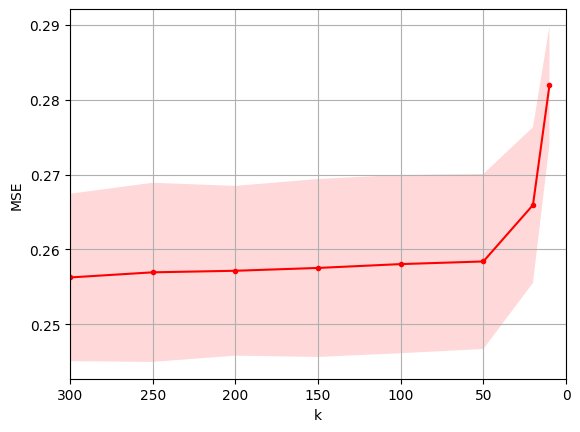

In [92]:
MSE_arr = -model.cv_results_['mean_test_score']
std_arr = model.cv_results_['std_test_score']
plt.plot(n_arr, MSE_arr, 'r.-')
plt.fill_between(n_arr, MSE_arr - std_arr, MSE_arr + std_arr, alpha=0.15, facecolor='red')
plt.xlim([max(n_arr), 0])
plt.grid()
plt.xlabel('k')
plt.ylabel('MSE')

In [93]:
model.best_params_['fit__n_estimators']

300

Запустим регрессию случайный лес с подобранным гиперпараметром

In [94]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=model.best_params_['fit__n_estimators'])
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print(f"- - - - Results - - - -\n\n"
      f"RMSE_train - {RMSE_train}\n"
      f"RMSE_test - {RMSE_test}\n"
      f"R2_train - {R2_train}\n"
      f"R2_test - {R2_test}\n")

- - - - Results - - - -

RMSE_train - 0.19934387320249378
RMSE_test - 0.4964427107718969
R2_train - 0.9600618006089284
R2_test - 0.7583889007229287



Благодаря методу случайный лес можно получить оценки важности признаков. Чем значение больше, тем признак важнее

In [95]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances

,0
Prod. year,2.551405e-01
Mileage,1.539850e-01
Airbags,9.763617e-02
Engine volume,8.626386e-02
Fuel type_Diesel,7.401792e-02
...,...
Manufacturer_ZAZ,5.533720e-07
Manufacturer_LANCIA,5.091004e-07
Manufacturer_სხვა,2.549533e-07
Manufacturer_HAVAL,0.000000e+00


Визуализируем эти данные

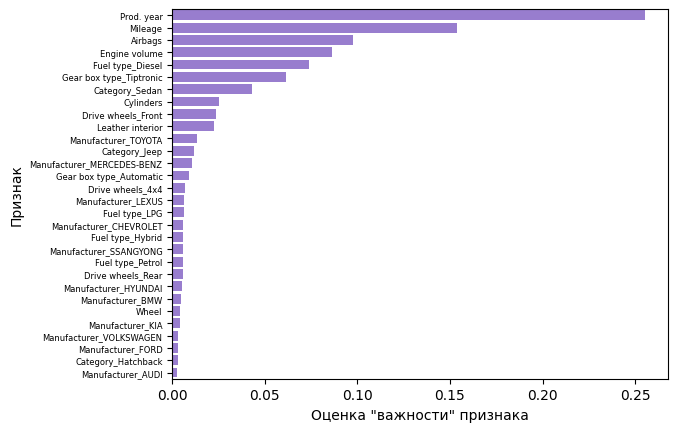

In [96]:
top_importances = importances.head(30)

sns.barplot(y=top_importances.index, x=top_importances, orient="h", color = 'mediumpurple')
plt.xlabel('Оценка "важности" признака')
plt.yticks(fontsize=6)
plt.ylabel('Признак')
plt.show()

# График фактических значений против предсказанных

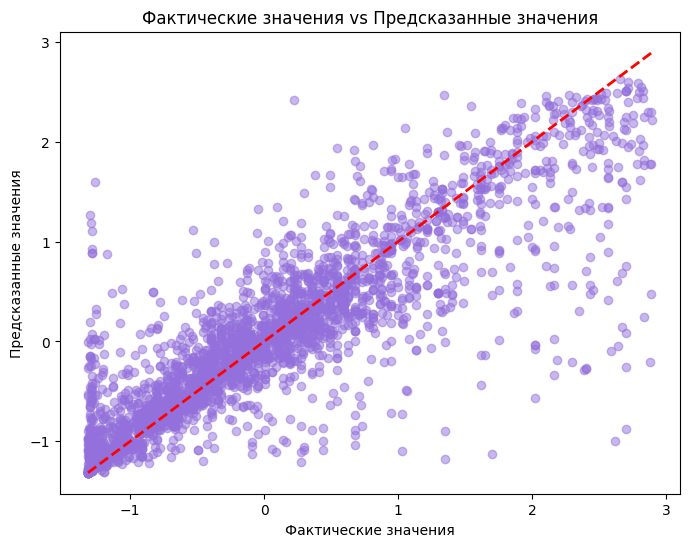

In [97]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_predict, alpha=0.5, color = 'mediumpurple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические значения vs Предсказанные значения")
plt.show()

# График ошибок (Residual Plot)

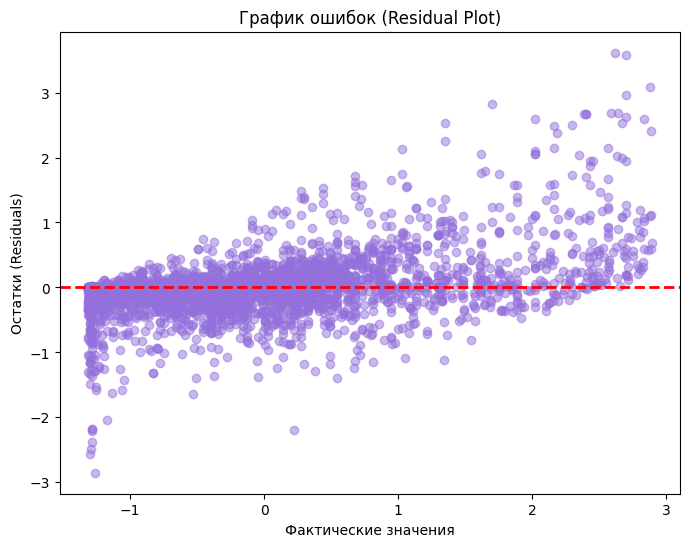

In [98]:
residuals = y_test - y_test_predict

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5, color = 'mediumpurple')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel("Фактические значения")
plt.ylabel("Остатки (Residuals)")
plt.title("График ошибок (Residual Plot)")
plt.show()

# Гистограмма ошибок (распределение остатков)

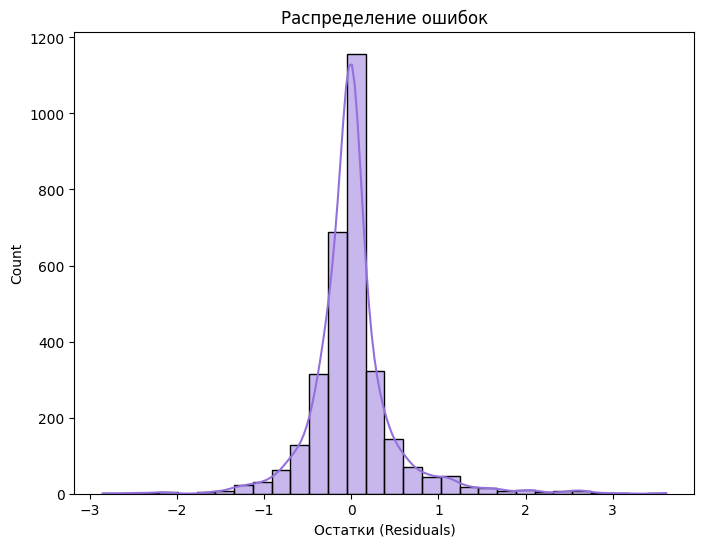

In [99]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color = 'mediumpurple')
plt.xlabel("Остатки (Residuals)")
plt.title("Распределение ошибок")
plt.show()

# Вывод по лабораторной работе

## Анализ результатов регрессий на данных о ценах на автомобили
Я провёл обучение трёх моделей регрессии: линейной регрессии, kNN-регрессии и случайного леса. Вот ключевые выводы по каждой модели:

### 1. Линейная регрессия:

- RMSE_train: 0.7919
- RMSE_test: 890258511842.6542
- R²_train: 0.3697
- R²_test: -7.77e+23

**Вывод**: Линейная регрессия показала крайне неудовлетворительные результаты. Очень высокий RMSE на тестовой выборке и отрицательное значение R² указывают на то, что модель совершенно не справляется с задачей предсказания цен на автомобили. Отрицательный R² свидетельствует о том, что модель предсказывает хуже, чем простое среднее значение. Это может быть связано с тем, что данные имеют нелинейные зависимости или сильные выбросы, с которыми линейная модель не справляется.

### 2. kNN-регрессия:

- RMSE_train: 0.4680
- RMSE_test: 0.6041
- R²_train: 0.780
- R²_test: 0.6422

**Вывод**: kNN-регрессия показывает значительно лучшие результаты по сравнению с линейной регрессией. Значения R² указывают на то, что модель объясняет около 78% вариации данных на обучающей выборке и 64% на тестовой. Разница в показателях между обучающей и тестовой выборками намекает на некоторое переобучение, но в целом модель демонстрирует неплохую способность к предсказанию.

### 3. Случайный лес (до настройки гиперпараметров):

- RMSE_train: 0.2025
- RMSE_test: 0.5005
- R²_train: 0.9587
- R²_test: 0.7544

**Вывод**: Случайный лес уже в базовой версии значительно превосходит как линейную регрессию, так и kNN-регрессию. Модель хорошо объясняет данные: R² на обучающей выборке составляет 95.9%, а на тестовой — 75.7%, что указывает на довольно высокую точность предсказаний с некоторыми признаками переобучения.

### 4. Случайный лес (после настройки гиперпараметров):

- RMSE_train: 0.1993
- RMSE_test: 0.4964
- R²_train: 0.9601
- R²_test: 0.7584

**Вывод**: Настройка гиперпараметра n_estimators для случайного леса привела к небольшому улучшению производительности модели. Показатели R² увеличились до 96.0% на обучающей выборке и 75.9% на тестовой выборке, а RMSE уменьшился, что указывает на улучшение качества предсказаний. Модель остаётся высокоэффективной, и различие между обучающей и тестовой выборками минимально, что свидетельствует об адекватной генерализации.